# NORMAL DISTRIBUTION OR Z_SCORE TREATMENT

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df=pd.read_csv('placement1.csv')
df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [3]:
df.sample(5)

,cgpa,placement_exam_marks,placed
649,7.60,65.0,1
338,7.45,46.0,1
575,7.55,16.0,0
681,6.78,10.0,1
458,7.13,47.0,0


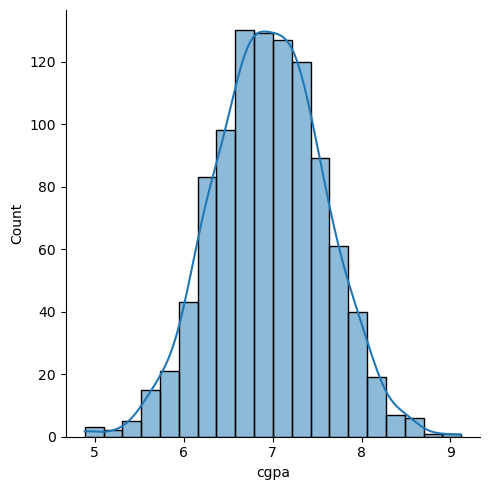

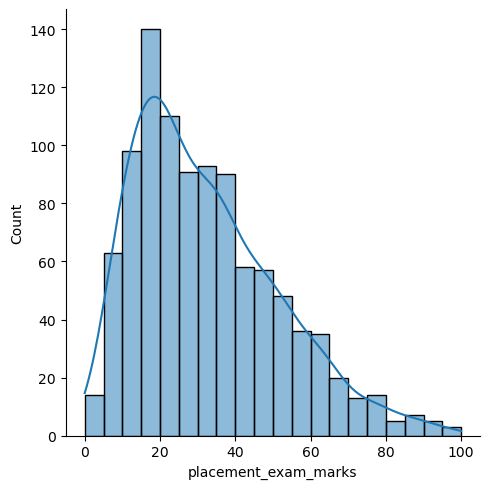

In [4]:
sns.displot(x='cgpa',data=df,kde=True,bins=20)
sns.displot(x='placement_exam_marks',data=df,kde=True,bins=20)
# HERE GRAPH ONE IS NORMAL DISTRIBUTION GRAPH AND SECOND ONE IS SKEWED 

In [5]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


# TRIMMIMG 

In [6]:
# Method 1 
# setting the upper limit and lower limit 
print('upper limit', df['cgpa'].mean() + 3*df['cgpa'].std())
print('lower limit', df['cgpa'].mean() - 3*df['cgpa'].std())

upper limit 8.808933625397177
lower limit 5.113546374602842


In [7]:
# now identify outliers
df[(df['cgpa']>8.80)| (df['cgpa']<5.11)]
# this dataframe contains the outliers in our main dataset

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [8]:
# Now Remove or Trimming the outliers

In [9]:
# Trimming 
new_df=df[(df['cgpa']<8.80) & (df['cgpa']>5.11)]
new_df
# Here we are getting the points which are greater than lower limit and smaller than upper limit 

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [10]:
# Method 2 
# we can also done trimming using z score 
df['z_score']= (df['cgpa']-df['cgpa'].mean())/df['cgpa'].std()
df

,cgpa,placement_exam_marks,placed,z_score
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
998,8.62,46.0,1,2.693239


In [11]:
# z_score has a limit of -3 to +3.
df[(df['z_score']>3) | (df['z_score']< -3)]
# here this data points are outliers beacuse these points are either lower than -3 or greater than +3 

,cgpa,placement_exam_marks,placed,z_score
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [12]:
# now here we will remove them 
new1_df= df[(df['z_score']<3) & (df['z_score']> -3)]
new1_df 

,cgpa,placement_exam_marks,placed,z_score
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


# CAPPING 

In [13]:
# In this if any point is greater than the upper limit then it is replaced by the upper limit and ,
# if any point is samller than the lower limit then it is replaced by the lower limit .
# Capping prevents us from doing trimming .

In [14]:
# here setting up  upper and lower limit and put them into corresponding variables. 
upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()

In [15]:
print(upper_limit)
print(lower_limit) 

8.808933625397177
5.113546374602842


In [16]:
# now here we will use np.where to do capping
#np.where(condition,x,y)
df['cgpa']=np.where(df['cgpa']>upper_limit,upper_limit,np.where(df['cgpa']<lower_limit,lower_limit,df['cgpa']))

In [17]:
# now after applying this condition , if we check cell 7 and 49 then we can say that min and max values are changed . 
df.describe()


,cgpa,placement_exam_marks,placed,z_score
count,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,6.961499,32.225000,0.489000,-1.600275e-14
std,0.612688,19.130822,0.500129,1.000000e+00
min,5.113546,0.000000,0.000000,-3.362960e+00
25%,6.550000,17.000000,0.000000,-6.677081e-01
50%,6.960000,28.000000,0.000000,-2.013321e-03
75%,7.370000,44.000000,1.000000,6.636815e-01
max,8.808934,100.000000,1.000000,3.505062e+00


In [18]:
# here we have total 1000 rows  means we haven't  removed any row ,instead of trimmimg we just did capping  
df.shape

(1000, 4)